In [ ]:
#Gill model runs--revised to more realistically mimic the precipitation
#perturbations in TRACMIP. 
#This version going a little more idealized again (symmetrical continent perturbations)

#Rick Russotto
#Started 16 January 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gill
from matplotlib.patches import Rectangle

In [2]:
#Run the setup M function for the various perturbations
#Tags: _oc: ocean 
#      _cc: continent central
#      _cn: continent north
#      _cs: continent south

setupDict_oc = gill.setupGillM_Gaussian(D0=-1.00, sx=2.78, sy=0.5, x0=-2.78, y0= 0.2)
setupDict_cc = gill.setupGillM_Gaussian(D0= 0.56, sx=1.12, sy=0.5, x0= 1.25, y0= 0.2)
setupDict_cn = gill.setupGillM_Gaussian(D0=-0.56, sx=1.12, sy=0.5, x0= 1.25, y0= 2.2)
setupDict_cs = gill.setupGillM_Gaussian(D0=-0.56, sx=1.12, sy=0.5, x0= 1.25, y0=-1.8)


In [3]:
#Run the computations
resultsDict_oc = gill.GillComputations(setupDict_oc['M'], 
                                       setupDict_oc['Mhat'], setupDict_oc['dMdyhat'])
resultsDict_cc = gill.GillComputations(setupDict_cc['M'], 
                                       setupDict_cc['Mhat'], setupDict_cc['dMdyhat'])
resultsDict_cn = gill.GillComputations(setupDict_cn['M'], 
                                       setupDict_cn['Mhat'], setupDict_cn['dMdyhat'])
resultsDict_cs = gill.GillComputations(setupDict_cs['M'], 
                                       setupDict_cs['Mhat'], setupDict_cs['dMdyhat'])

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [4]:

#####   PLOTS   #####


In [5]:
#Define grid for plotting:
nx=128
ny=120
lx=20
ly=20

dx = lx/nx
x = -lx/2.+dx*np.arange(nx)
dy = ly/ny
y = -ly/2.+dy*np.arange(ny+1)

stride=4

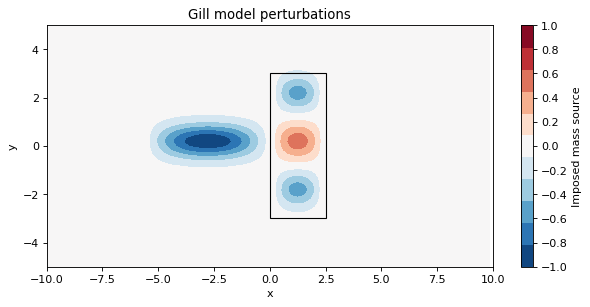

In [6]:
#Plot the energy perturbations (all superimposed together)
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x,y,setupDict_oc['M']+setupDict_cc['M']+setupDict_cn['M']+setupDict_cs['M'],
           levels=np.linspace(-1,1,12), cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Imposed mass source')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gill model perturbations')
plt.axis([-10, 10, -5, 5])

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_perturb_4_lobes.png')
plt.savefig('figures/Gill_perturb_4_lobes.pdf')

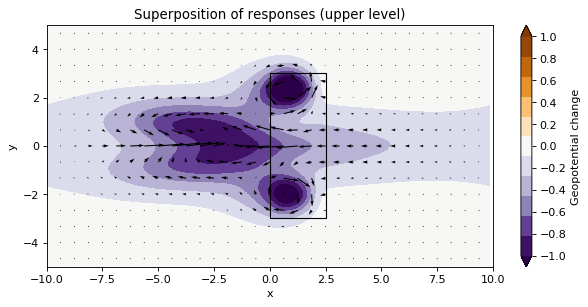

In [7]:
#Plot results
#Sum of the responses
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict_oc['phi'] + resultsDict_cc['phi']
             +resultsDict_cn['phi']+resultsDict_cs['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses (upper level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict_oc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['u'][0:ny:stride,0:nx:stride],
           resultsDict_oc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['v'][0:ny:stride,0:nx:stride],
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_4_lobes_upper.png')
plt.savefig('figures/Gill_results_4_lobes_upper.pdf')

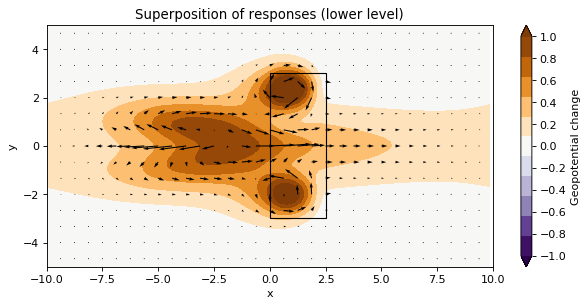

In [8]:
#Lower level: negative of the same thing
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, -(resultsDict_oc['phi'] + resultsDict_cc['phi']
             +resultsDict_cn['phi']+resultsDict_cs['phi']), 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses (lower level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           -(resultsDict_oc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['u'][0:ny:stride,0:nx:stride]),
           -(resultsDict_oc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['v'][0:ny:stride,0:nx:stride]),
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_4_lobes_lower.png')
plt.savefig('figures/Gill_results_4_lobes_lower.pdf')

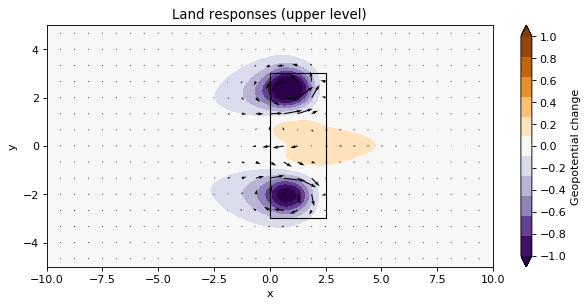

In [9]:
#Separate out into different "building blocks": the response to the continent perturbation (contraction) and the ocean perturbation

#Land: (upper)
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict_cc['phi']
             +resultsDict_cn['phi']+resultsDict_cs['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Land responses (upper level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict_cc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['u'][0:ny:stride,0:nx:stride],
           resultsDict_cc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['v'][0:ny:stride,0:nx:stride],
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_land_tripole_upper.png')
plt.savefig('figures/Gill_results_land_tripole_upper.pdf')

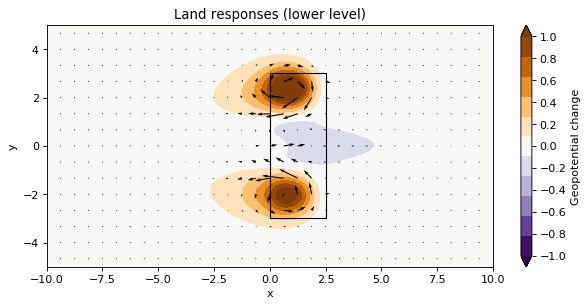

In [11]:
#Land: (lower)
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, -(resultsDict_cc['phi']
             +resultsDict_cn['phi']+resultsDict_cs['phi']), 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Land responses (lower level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           -(resultsDict_cc['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['u'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['u'][0:ny:stride,0:nx:stride]),
           -(resultsDict_cc['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cn['v'][0:ny:stride,0:nx:stride] + 
           resultsDict_cs['v'][0:ny:stride,0:nx:stride]),
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_land_tripole_lower.png')
plt.savefig('figures/Gill_results_land_tripole_lower.pdf')

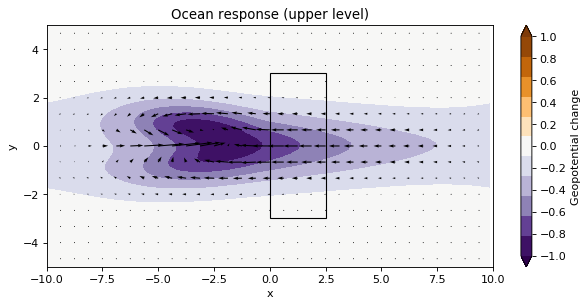

In [16]:
#Ocean (upper)
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict_oc['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ocean response (upper level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict_oc['u'][0:ny:stride,0:nx:stride],
           resultsDict_oc['v'][0:ny:stride,0:nx:stride],
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_ocean_upper.png')
plt.savefig('figures/Gill_results_ocean_upper.pdf')

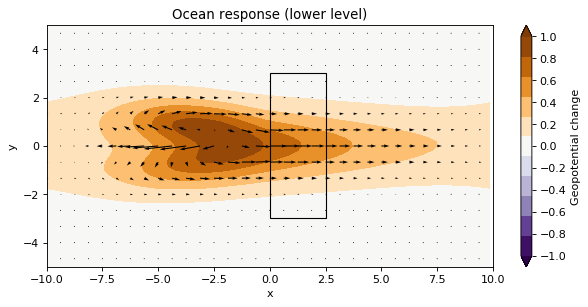

In [17]:
#Ocean (lower)
plt.figure(figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, -resultsDict_oc['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ocean response (lower level)')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           -resultsDict_oc['u'][0:ny:stride,0:nx:stride],
           -resultsDict_oc['v'][0:ny:stride,0:nx:stride],
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((0, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/Gill_results_ocean_lower.png')
plt.savefig('figures/Gill_results_ocean_lower.pdf')